In [3]:
# Data Preprocessing
# Read data from external file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

dfCSV = pd.read_csv("/Users/USER/Desktop/Semester 5/CSC649/dataMobile.csv")

In [5]:
#Preview
print(dfCSV.head())
print(dfCSV.columns)

            Timestamp Type of Mobile Plan\nJenis Pelan Mudah Alih  \
0  5/18/2025 21:34:22                                     Prepaid   
1  5/18/2025 21:40:52                                     Prepaid   
2  5/18/2025 23:29:07                                    Postpaid   
3  5/18/2025 23:42:45                                     Prepaid   
4  5/18/2025 23:43:18                                     Prepaid   

  Are you satisfied with your current type of mobile plan? (Postpaid/Prepaid)\nAdakah anda berpuas hati dengan jenis pelan mudah alih anda? (Pascabayar/Prabayar)  \
0                                           Yes / Ya                                                                                                                
1                                           Yes / Ya                                                                                                                
2                                         No / Tidak                                      

In [261]:
#1st chart
#Rename the column for easier access
dfCSV.rename(columns={
    "Average Monthly Data Usage (GB) Purata Penggunaan Data Bulanan (GB) eg 20": "Avg_Monthly_Data_Usage"
}, inplace=True)

In [265]:
# Step 2: Convert to numeric and drop NaNs
dfCSV["Avg_Monthly_Data_Usage"] = pd.to_numeric(dfCSV["Avg_Monthly_Data_Usage"], errors='coerce')
df_cleaned = dfCSV.dropna(subset=["Avg_Monthly_Data_Usage"])

KeyError: 'Avg_Monthly_Data_Usage'

In [59]:
#Remove outliers using Z-score
from scipy.stats import zscore

df_cleaned = df_cleaned.copy()
df_cleaned["Zscore"] = zscore(df_cleaned["Avg_Monthly_Data_Usage"])

# Calculate Z-scores
df_cleaned["Zscore"] = zscore(df_cleaned["Avg_Monthly_Data_Usage"])

# Filter to keep only values within ±3 standard deviations
df_no_outliers = df_cleaned[abs(df_cleaned["Zscore"]) <= 3]


In [39]:
#Extract Data and calculate Mean, std
data = df_no_outliers["Avg_Monthly_Data_Usage"].values
mean = np.mean(data)
std = np.std(data)

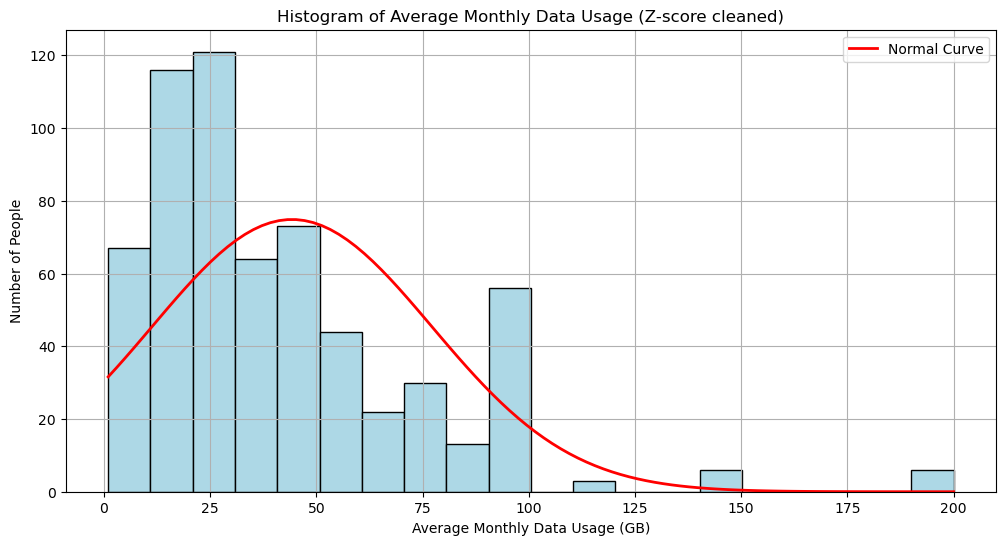

In [63]:
#Plot histogram for Average Monthly Data Usage
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

mean = np.mean(data)
std = np.std(data)

data_under_200 = data[data <= 200]

plt.figure(figsize=(12, 6))
plt.hist(data_under_200, bins=20, color='lightblue', edgecolor='black', density=False)

x = np.linspace(data_under_200.min(), data_under_200.max(), 100)
y = norm.pdf(x, np.mean(data_under_200), np.std(data_under_200)) * len(data_under_200) * (data_under_200.max() - data_under_200.min()) / 20
plt.plot(x, y, color='red', linewidth=2, label='Normal Curve')

plt.xlabel('Average Monthly Data Usage (GB)')
plt.ylabel('Number of People')
plt.title('Histogram of Average Monthly Data Usage (Z-score cleaned)')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
#Second graph
# Inspect the column name
print(dfCSV.columns)

Index(['Timestamp', 'Type of Mobile Plan Jenis Pelan Mudah Alih',
       'Are you satisfied with your current type of mobile plan (PostpaidPrepaid) Adakah anda berpuas hati dengan jenis pelan mudah alih anda (PascabayarPrabayar)',
       'Age Umur eg 22', 'Gender Jantina', 'Occupation Pekerjaan',
       'Income (RM) Pendapatan (RM) eg 5000',
       'Education Level Tahap Pendidikan', 'Marital Status Status Perkahwinan',
       'Number of dependents (person) Bilangan tanggungan (orang) eg 5',
       'Location Tempat tinggal', 'Avg_Monthly_Data_Usage',
       'Do you often play games (eg Mobile Legends Genshin Impact)  Adakah anda sering bermain permainan (eg Mobile Legends) ',
       'Do you often stream (eg Youtube Netflix) Adakah anda sering melayari penstriman  (eg Youtube Netflix)',
       'Do you often use social media (eg TikTok Instagram) Adakah anda sering menggunakan media sosial  (eg TikTok Instagram)',
       'Average Daily Time Spent On Mobile Device (Hours) Purata Masa Hari

In [125]:
#Rename the column for easier access
df.rename(columns={'Monthly Expenses on mobile plan (RM)': 'Monthly_Expenses'}, inplace=True)

# Drop missing values if any
monthly_expenses = df['Monthly_Expenses'].dropna()

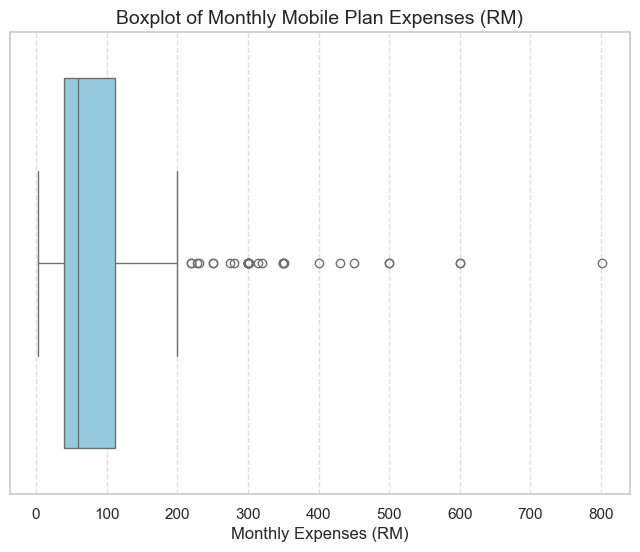

In [127]:
# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=monthly_expenses, color='skyblue')

# Customizing the plot
plt.title("Boxplot of Monthly Mobile Plan Expenses (RM)", fontsize=14)
plt.xlabel("Monthly Expenses (RM)", fontsize=12)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.show()

In [259]:
#2nd chart
# Inspect the column name
print(dfCSV.columns)

Index(['Timestamp', 'Type of Mobile Plan Jenis Pelan Mudah Alih',
       'Are you satisfied with your current type of mobile plan (PostpaidPrepaid) Adakah anda berpuas hati dengan jenis pelan mudah alih anda (PascabayarPrabayar)',
       'Age Umur eg 22', 'Gender Jantina', 'Occupation Pekerjaan',
       'Income (RM) Pendapatan (RM) eg 5000',
       'Education Level Tahap Pendidikan', 'Marital Status Status Perkahwinan',
       'Number of dependents (person) Bilangan tanggungan (orang) eg 5',
       'Location Tempat tinggal', 'Monthly_Data_Usage',
       'Do you often play games (eg Mobile Legends Genshin Impact)  Adakah anda sering bermain permainan (eg Mobile Legends) ',
       'Do you often stream (eg Youtube Netflix) Adakah anda sering melayari penstriman  (eg Youtube Netflix)',
       'Do you often use social media (eg TikTok Instagram) Adakah anda sering menggunakan media sosial  (eg TikTok Instagram)',
       'Daily_Mobile_Usage', 'Hotspot Usage Penggunaan Hotspot',
       'Curre

In [157]:
# Clean column name
col = 'Average Daily Time Spent On Mobile Device (Hours) Purata Masa Harian Menggunakan Telefon Bimbit (Jam) eg 2'

In [159]:
# Drop NA and sort value counts
counts = dfCSV[col].dropna().value_counts().sort_index()

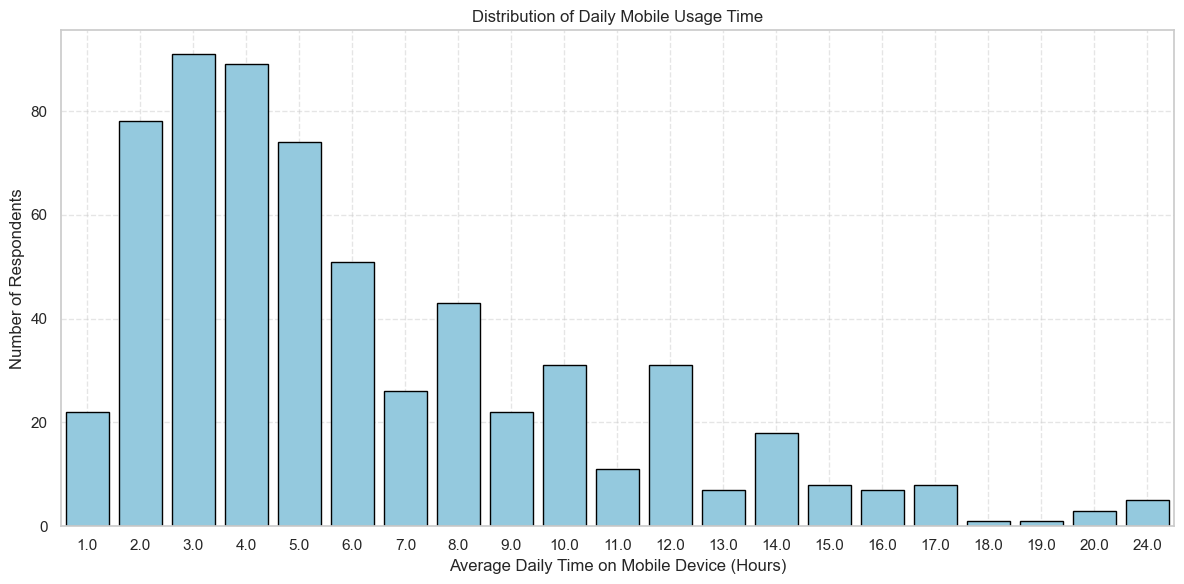

In [161]:
# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index, y=counts.values, color='skyblue', edgecolor='black')
plt.xlabel("Average Daily Time on Mobile Device (Hours)")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Daily Mobile Usage Time")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [257]:
#3rd Chart
# Rename columns for easier access
df = df.rename(columns={
    'Type of Mobile Plan Jenis Pelan Mudah Alih': 'User_Type',
    'Monthly_Expenses': 'Monthly_Expenses'
})

In [167]:
# Drop missing values for the relevant columns
df_violin = df[['User_Type', 'Monthly_Expenses']].dropna()

In [169]:
# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

<Figure size 1000x600 with 0 Axes>

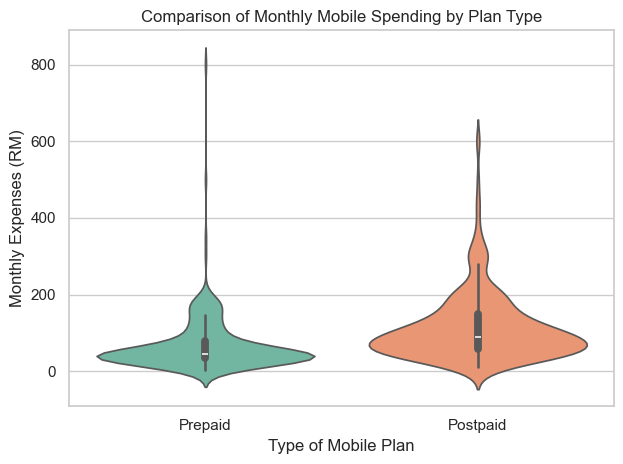

In [177]:
# Create the violin plot
sns.violinplot(x='User_Type', y='Monthly_Expenses', hue='User_Type',
               data=df_violin, palette='Set2', inner='box', legend=False)

# Add titles and labels
plt.title("Comparison of Monthly Mobile Spending by Plan Type")
plt.xlabel("Type of Mobile Plan")
plt.ylabel("Monthly Expenses (RM)")
plt.tight_layout()

# Show the plot
plt.show()

In [255]:
#4th Chart
# Rename for easier access
dfCSV = dfCSV.rename(columns={
    'Average Daily Time Spent On Mobile Device (Hours) Purata Masa Harian Menggunakan Telefon Bimbit (Jam) eg 2': 'Usage_Hours',
    'Monthly_Expenses': 'Monthly_Expenses'
})

In [197]:
# Drop missing values
dfCSV_scatter = dfCSV[['Usage_Hours', 'Monthly_Expenses']].dropna()

# Set plot style and size
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

<Figure size 1000x600 with 0 Axes>

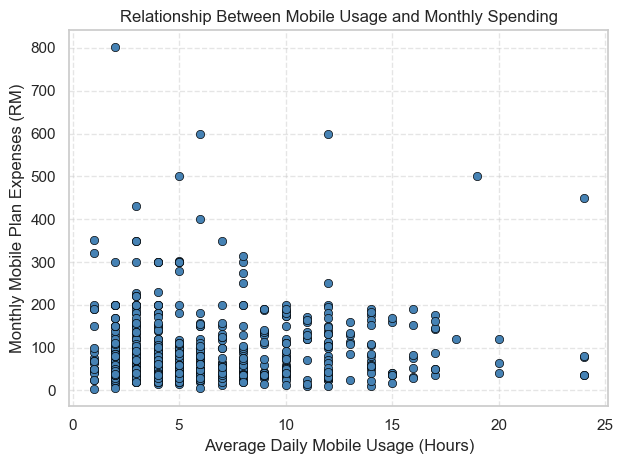

In [199]:
# Scatter plot
sns.scatterplot(x='Usage_Hours', y='Monthly_Expenses', data=dfCSV_scatter, color='steelblue', edgecolor='black')

# Labels and title
plt.xlabel("Average Daily Mobile Usage (Hours)")
plt.ylabel("Monthly Mobile Plan Expenses (RM)")
plt.title("Relationship Between Mobile Usage and Monthly Spending")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()

In [253]:
#5th Chart
#Rename columns for easier access
df = df.rename(columns={
    'Number of years with current telco Jumlah tahun dengan telco sekarang eg 3': 'Years_With_Telco',
    'Monthly_Expenses': 'Monthly_Expenses'
})

In [203]:
# Drop rows with missing values
df_line = df[['Years_With_Telco', 'Monthly_Expenses']].dropna()

In [213]:
# Group by number of years, then calculate average spending
grouped = df_line.groupby('Years_With_Telco').mean().reset_index()

# Create a full range from 0 to 100 years
full_range = pd.DataFrame({'Years_With_Telco': range(0, 101)})

# Merge with actual data and interpolate missing values for smooth line
grouped_full = pd.merge(full_range, grouped, on='Years_With_Telco', how='left')
grouped_full['Monthly_Expenses'] = grouped_full['Monthly_Expenses'].interpolate(method='linear')

# Set up plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

<Figure size 1000x600 with 0 Axes>

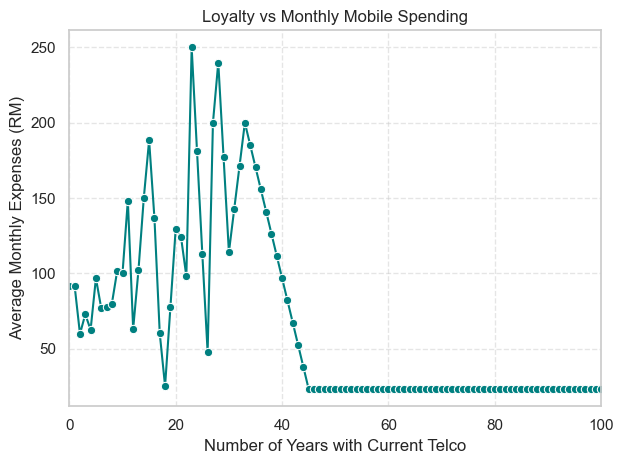

In [227]:
# Plot the line
sns.lineplot(data=grouped_full, x='Years_With_Telco', y='Monthly_Expenses', marker='o', color='teal')

# Customize axes and title
plt.xlim(0, 100)
plt.xlabel("Number of Years with Current Telco")
plt.ylabel("Average Monthly Expenses (RM)")
plt.title("Loyalty vs Monthly Mobile Spending")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [251]:
#6th Chart
# Inspect the column name
print(dfCSV.columns)

Index(['Timestamp', 'Type of Mobile Plan Jenis Pelan Mudah Alih',
       'Are you satisfied with your current type of mobile plan (PostpaidPrepaid) Adakah anda berpuas hati dengan jenis pelan mudah alih anda (PascabayarPrabayar)',
       'Age Umur eg 22', 'Gender Jantina', 'Occupation Pekerjaan',
       'Income (RM) Pendapatan (RM) eg 5000',
       'Education Level Tahap Pendidikan', 'Marital Status Status Perkahwinan',
       'Number of dependents (person) Bilangan tanggungan (orang) eg 5',
       'Location Tempat tinggal', 'Monthly_Data_Usage',
       'Do you often play games (eg Mobile Legends Genshin Impact)  Adakah anda sering bermain permainan (eg Mobile Legends) ',
       'Do you often stream (eg Youtube Netflix) Adakah anda sering melayari penstriman  (eg Youtube Netflix)',
       'Do you often use social media (eg TikTok Instagram) Adakah anda sering menggunakan media sosial  (eg TikTok Instagram)',
       'Daily_Mobile_Usage', 'Hotspot Usage Penggunaan Hotspot',
       'Curre

In [241]:
# Rename relevant numerical columns for ease of use
dfCSV = dfCSV.rename(columns={
    'Avg_Monthly_Data_Usage': 'Monthly_Data_Usage',
    'Usage_Hours': 'Daily_Mobile_Usage',
    'Number of years with current telco Jumlah tahun dengan telco sekarang eg 3': 'Years_With_Telco',
    'Monthly_Expenses': 'Monthly_Expenses',
    'Number of SIM cards owned Bilangan kad SIM yang dimiliki eg 2': 'SIM_Cards_Owned',
    'Number of device owned (Laptops phones tablets) Jumlah peranti yang dimiliki (Komputer riba telefon bimbit tablet) eg 3': 'Devices_Owned',
    'Number of lines in household Jumlah talian mudah alih dalam isi rumah eg 4': 'Household_Lines'
})

In [243]:
# Select only the 7 numerical features
numerical_cols = [
    'Monthly_Data_Usage',
    'Daily_Mobile_Usage',
    'Years_With_Telco',
    'Monthly_Expenses',
    'SIM_Cards_Owned',
    'Devices_Owned',
    'Household_Lines'
]

In [245]:
dfCSV_numerical = dfCSV[numerical_cols].dropna()

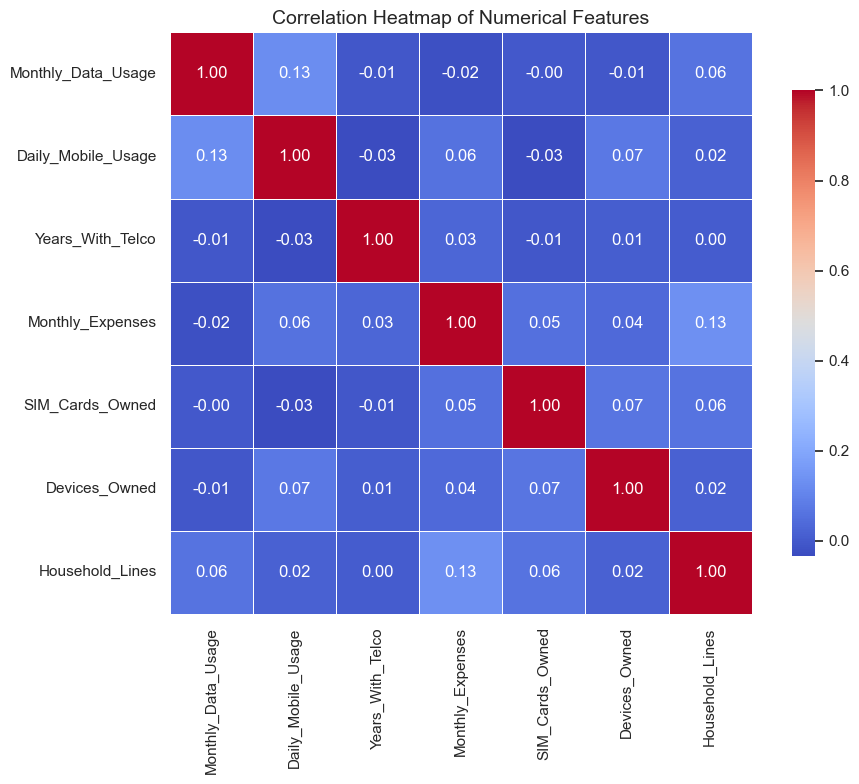

In [249]:
# Compute the correlation matrix
correlation_matrix = dfCSV_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

# Add titles and formatting
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

In [267]:
#8th Chart
# Inspect the column name
print(dfCSV.columns)

Index(['Timestamp', 'Type of Mobile Plan Jenis Pelan Mudah Alih',
       'Are you satisfied with your current type of mobile plan (PostpaidPrepaid) Adakah anda berpuas hati dengan jenis pelan mudah alih anda (PascabayarPrabayar)',
       'Age Umur eg 22', 'Gender Jantina', 'Occupation Pekerjaan',
       'Income (RM) Pendapatan (RM) eg 5000',
       'Education Level Tahap Pendidikan', 'Marital Status Status Perkahwinan',
       'Number of dependents (person) Bilangan tanggungan (orang) eg 5',
       'Location Tempat tinggal', 'Monthly_Data_Usage',
       'Do you often play games (eg Mobile Legends Genshin Impact)  Adakah anda sering bermain permainan (eg Mobile Legends) ',
       'Do you often stream (eg Youtube Netflix) Adakah anda sering melayari penstriman  (eg Youtube Netflix)',
       'Do you often use social media (eg TikTok Instagram) Adakah anda sering menggunakan media sosial  (eg TikTok Instagram)',
       'Daily_Mobile_Usage', 'Hotspot Usage Penggunaan Hotspot',
       'Curre

In [269]:
# Select top 5 numerical features to compare
selected_cols = [
    'Monthly_Data_Usage',
    'Daily_Mobile_Usage',
    'Years_With_Telco',
    'Monthly_Expenses',
    'Devices_Owned'
]

In [273]:
# Drop missing values
dfCSV_pair = dfCSV[selected_cols].dropna()

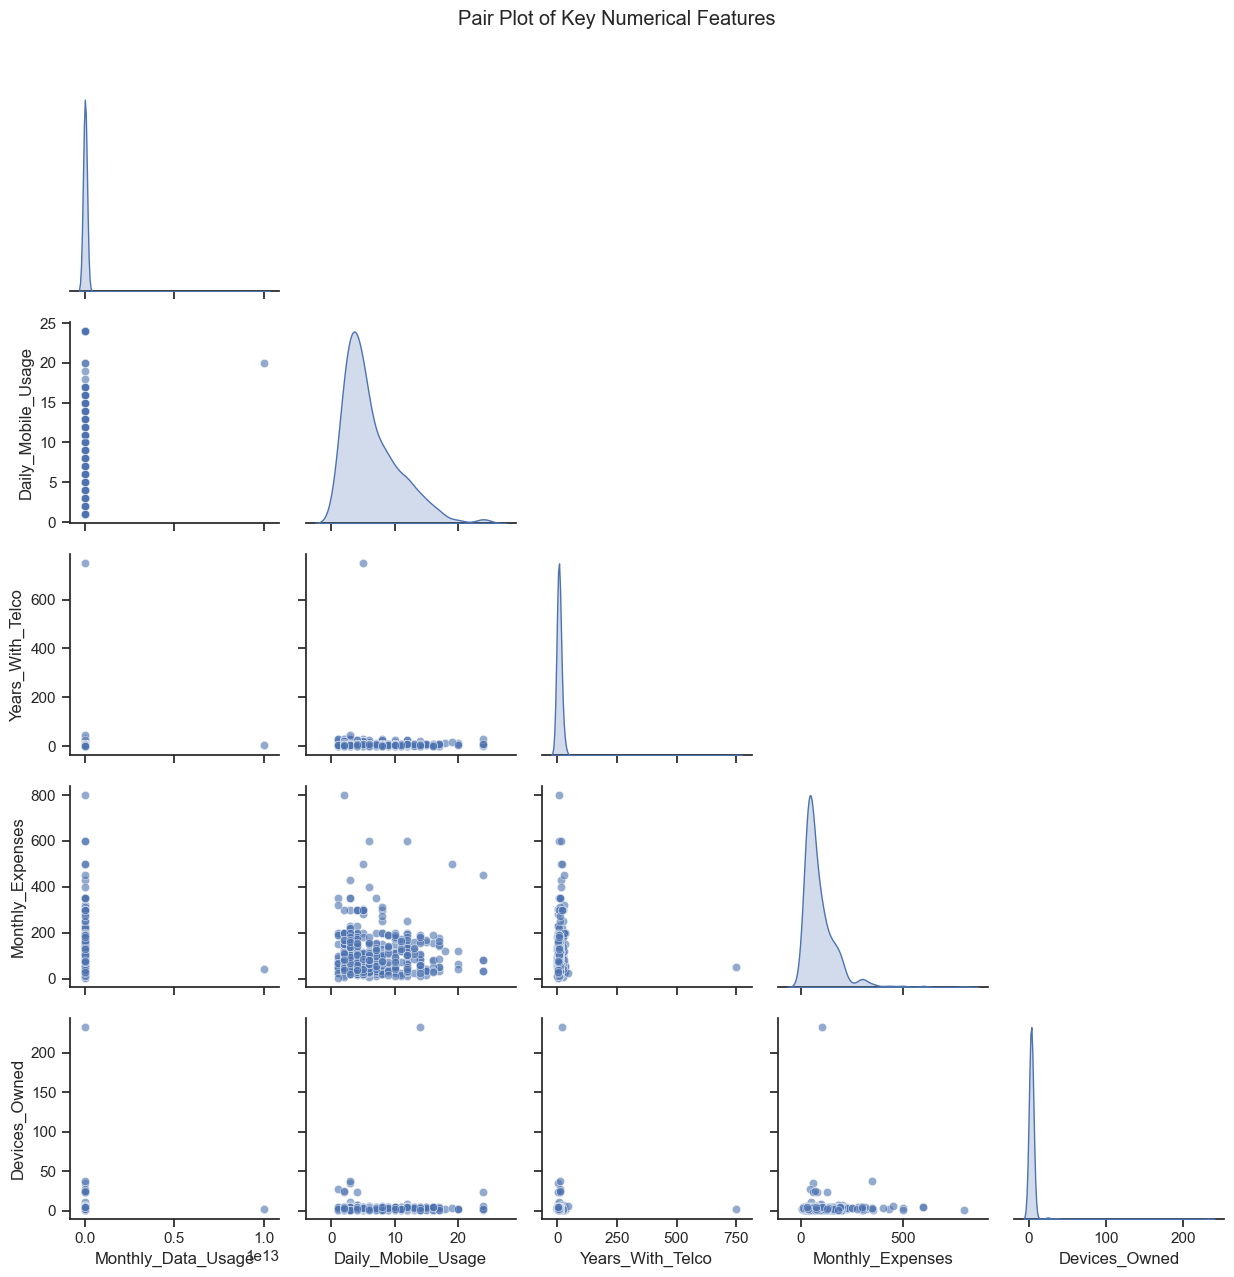

In [277]:
# Set plot style
sns.set(style="ticks")

# Create the pair plot
sns.pairplot(dfCSV_pair, diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})

# Show plot
plt.suptitle("Pair Plot of Key Numerical Features", y=1.02)
plt.tight_layout()
plt.show()